# Exploratory Data Analysis - Retail Forecasting

### Import packages and load data

In [1]:
# Load packages
import pandas as pd
import numpy as np
import datetime
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

# Set so jupyter displays all columns
pd.set_option('display.max_columns', False)

# Set Seaborn style for plots
sns.set()

# Matplotlib inline
%matplotlib inline

In [2]:
# Change directory and load data
os.chdir('../data/interim')
df = pd.read_csv('joined data full.csv')
dfpre = pd.read_csv('joined data pre-markdowns.csv')
dfpost = pd.read_csv('joined data post-markdowns.csv')

### Create categorical month and week features

In [3]:
# Create categorical date features for month and week
df.Date = pd.to_datetime(df.Date)
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Week'] = pd.DatetimeIndex(df['Date']).week

dfpre.Date = pd.to_datetime(dfpre.Date)
dfpre['Month'] = pd.DatetimeIndex(dfpre['Date']).month
dfpre['Week'] = pd.DatetimeIndex(dfpre['Date']).week

dfpost.Date = pd.to_datetime(dfpost.Date)
dfpost['Month'] = pd.DatetimeIndex(dfpost['Date']).month
dfpost['Week'] = pd.DatetimeIndex(dfpost['Date']).week

### Visualize entire dataset

#### Group data by date and store, aggregate sum weekly sales, and plot

In [4]:
# Group dataframe by store and date and aggregate mean weekly sales
df1s = df.groupby(['Store', 'Date'])[['Weekly_Sales']].sum().sort_index()

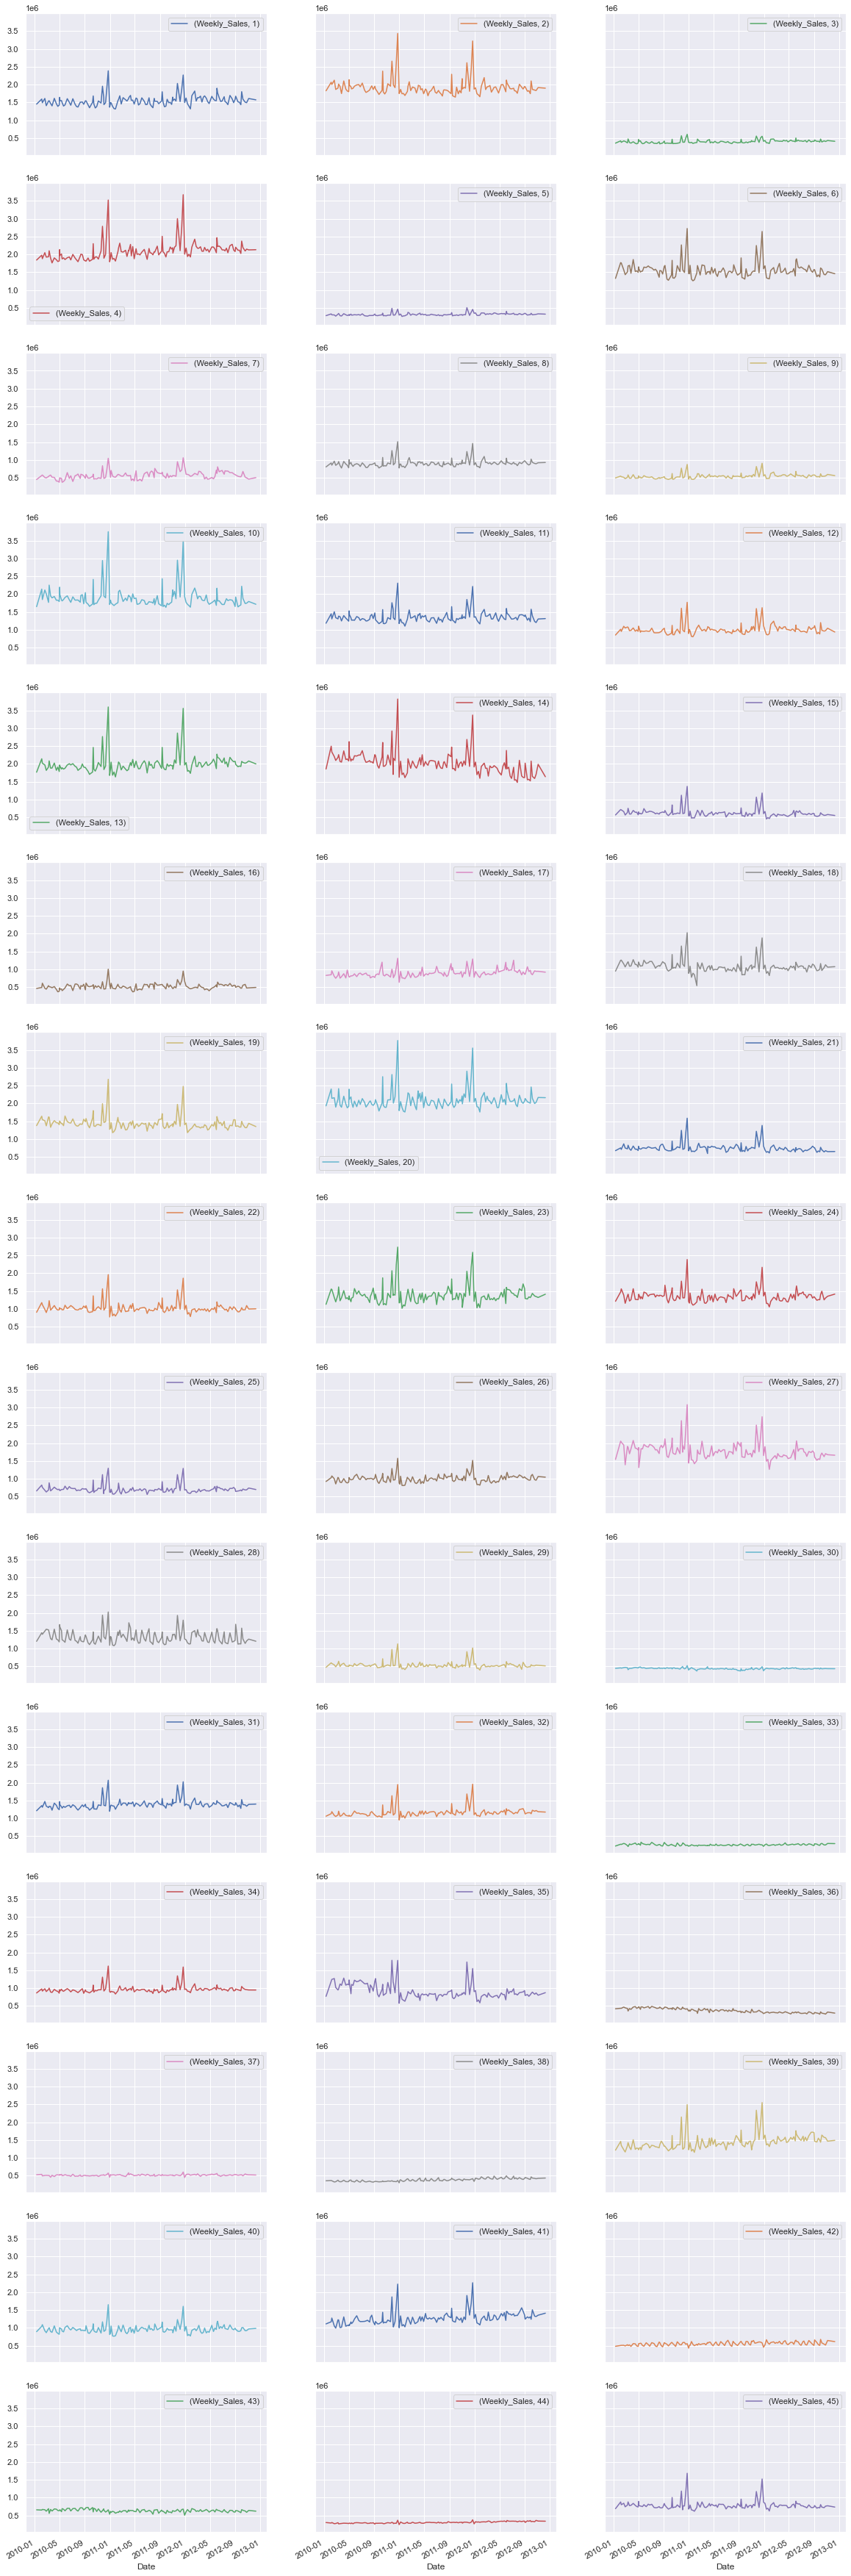

In [5]:
# Plot store-wide weekly sales for all stores, ordered by date
_ = df1s.unstack(level=0).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
_ = plt.ylabel('Weekly Sales')
plt.show()
plt.close()

#### Group data by date and store, aggregate mean weekly sales, and plot

In [6]:
# Group dataframe by store and date and aggregate mean weekly sales
df1m = df.groupby(['Store', 'Date'])[['Weekly_Sales']].mean().sort_index()

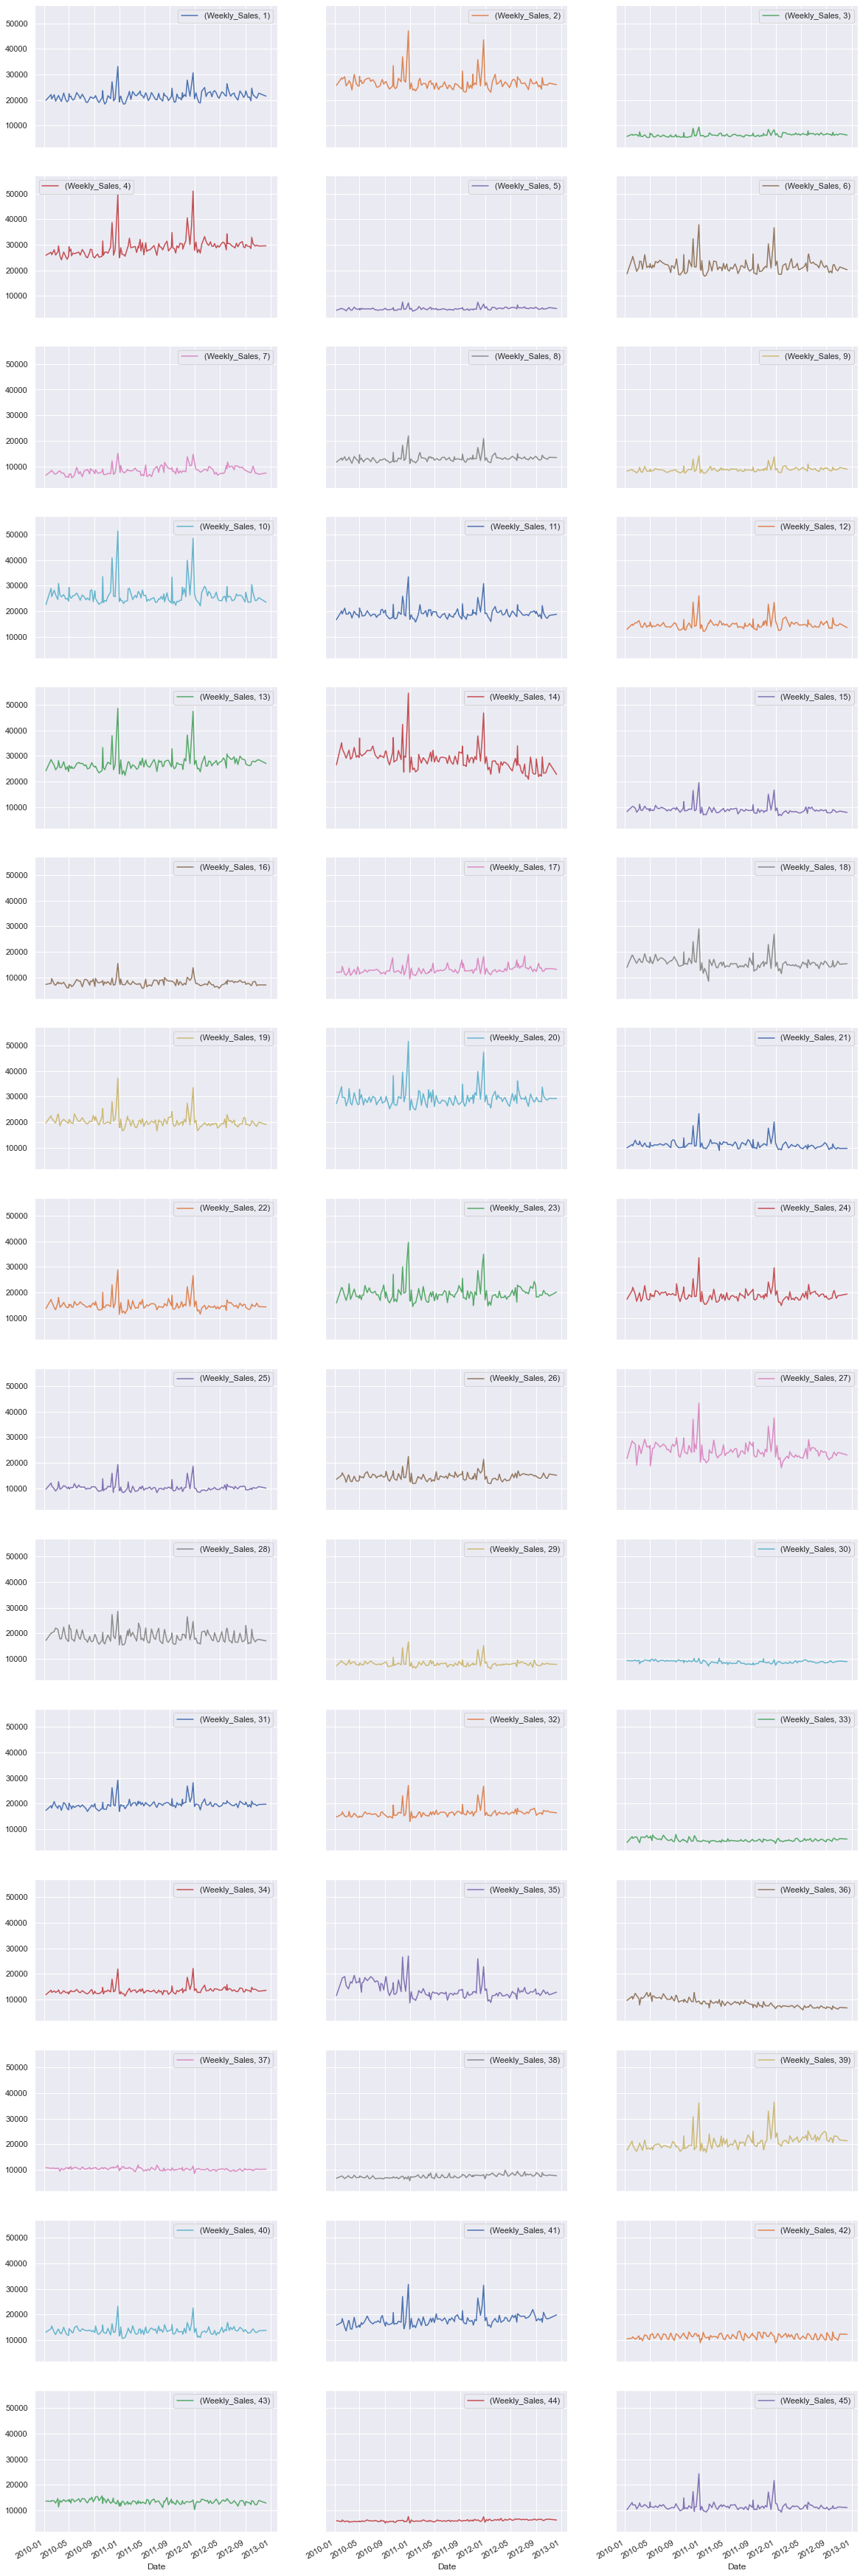

In [7]:
# Do the same but aggregating for mean rather than sum
_ = df1m.unstack(level=0).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
_ = plt.ylabel('Weekly Sales')
plt.show()
plt.close()

In [8]:
# Group data by store and aggregate mean weekly sales
df1m1 = df.groupby(['Store', 'Type', 'Size'])[['Weekly_Sales']].mean().reset_index()

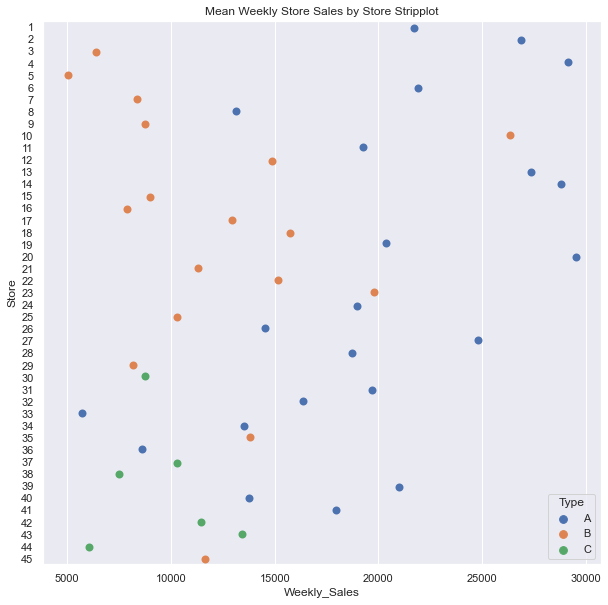

In [9]:
# Strip plot of all stores, hue by type
_, ax = plt.subplots(figsize=(10, 10))
_ = sns.stripplot(x='Weekly_Sales', y='Store', hue='Type', data=df1m1, ax=ax, orient='h', size=8)
plt.title('Mean Weekly Store Sales by Store Stripplot')
plt.show()
plt.close()

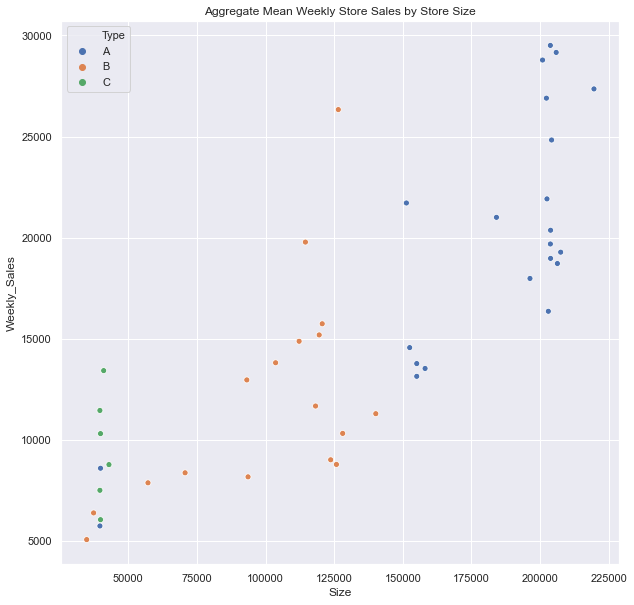

In [10]:
_, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=df1m1, ax=ax)
plt.title('Scatterplot - Aggregate Mean Weekly Store Sales by Store Size')
plt.show()
plt.close()

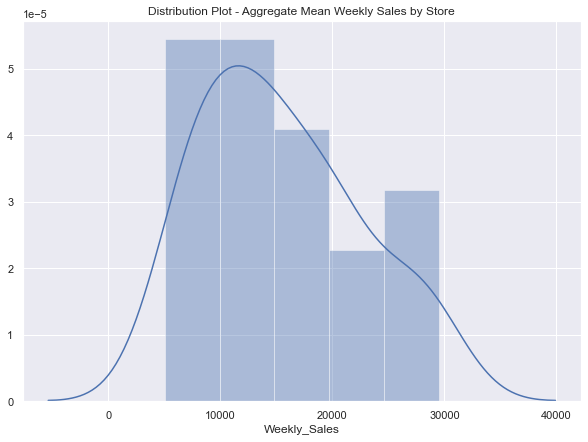

In [62]:
# Plot distplot plot of store mean weekly sales to get a sense of distribution.
_ = plt.figure(figsize=(10, 7))
_ = sns.distplot(df1m1['Weekly_Sales'])
plt.title('Distribution Plot - Aggregate Mean Weekly Sales by Store')
plt.show()
plt.close()

#### Group data by date and type, aggregate sum weekly sales, and plot

In [11]:
# Group dataframe by date and Type and aggregate sum weekly sales
df2s = df.groupby(['Date', 'Type'])[['Weekly_Sales']].sum().sort_index()

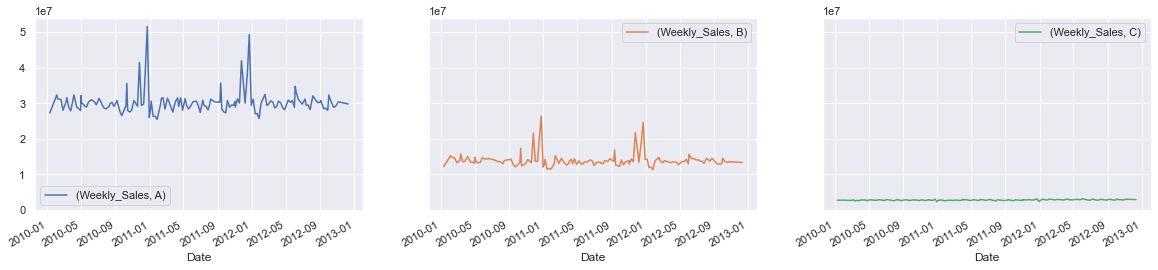

In [12]:
# Plot store-wide weekly sales for all store types, ordered by date
_ = df2s.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (15, 3), sharey=True, sharex=True)
plt.show()
plt.close()

#### Group data by date and type, aggregate mean weekly sales, and plot

In [19]:
# Group dataframe by date and Type and aggregate mean weekly sales
df2m = df.groupby(['Date', 'Type'])[['Weekly_Sales']].mean().sort_index()

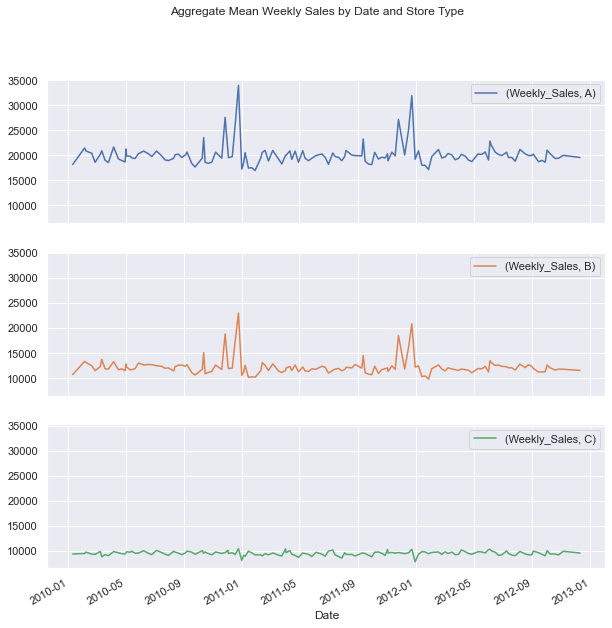

In [36]:
# Do the same but aggregating for mean rather than sum
_ = df2m.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, \
                                            title='Aggregate Mean Weekly Sales by Date and Store Type', figsize = (10, 10), sharey=True, sharex=True)
plt.show()
plt.close()

A stores have the most sales, followed by B stores, and then C stores

In [61]:
# Group data by store and type, aggregate mean weekly sales, and reset index
df2m1 = df.groupby(['Store', 'Type'])[['Weekly_Sales']].mean().reset_index()

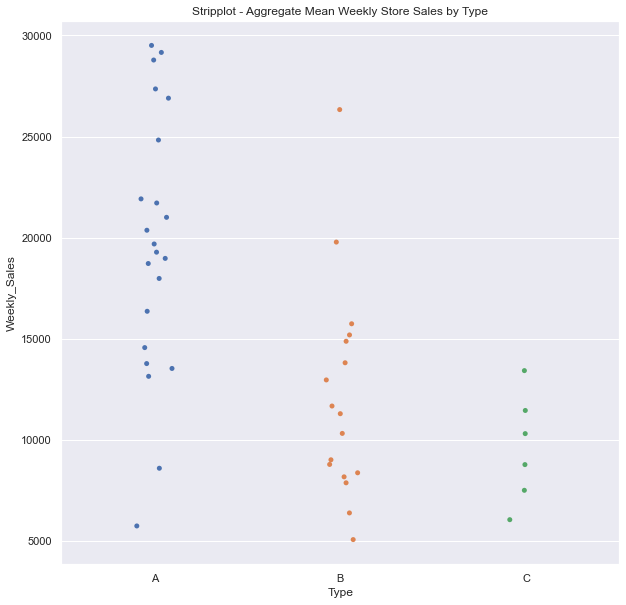

In [66]:
# Visual mean Weekly Sales by store Type
_ = plt.figure(figsize=(10, 10))
_ = sns.stripplot(x='Type', y='Weekly_Sales', data=df2m1)
plt.title('Stripplot - Aggregate Mean Weekly Store Sales by Type')
plt.show()
plt.close()

#### Group data by date and department, aggregate sum weekly sales, and plot

In [17]:
# Group dataframe by date and department and aggregate sum weekly sales
df3s = df.groupby(['Date', 'Dept'])[['Weekly_Sales']].sum().sort_index()

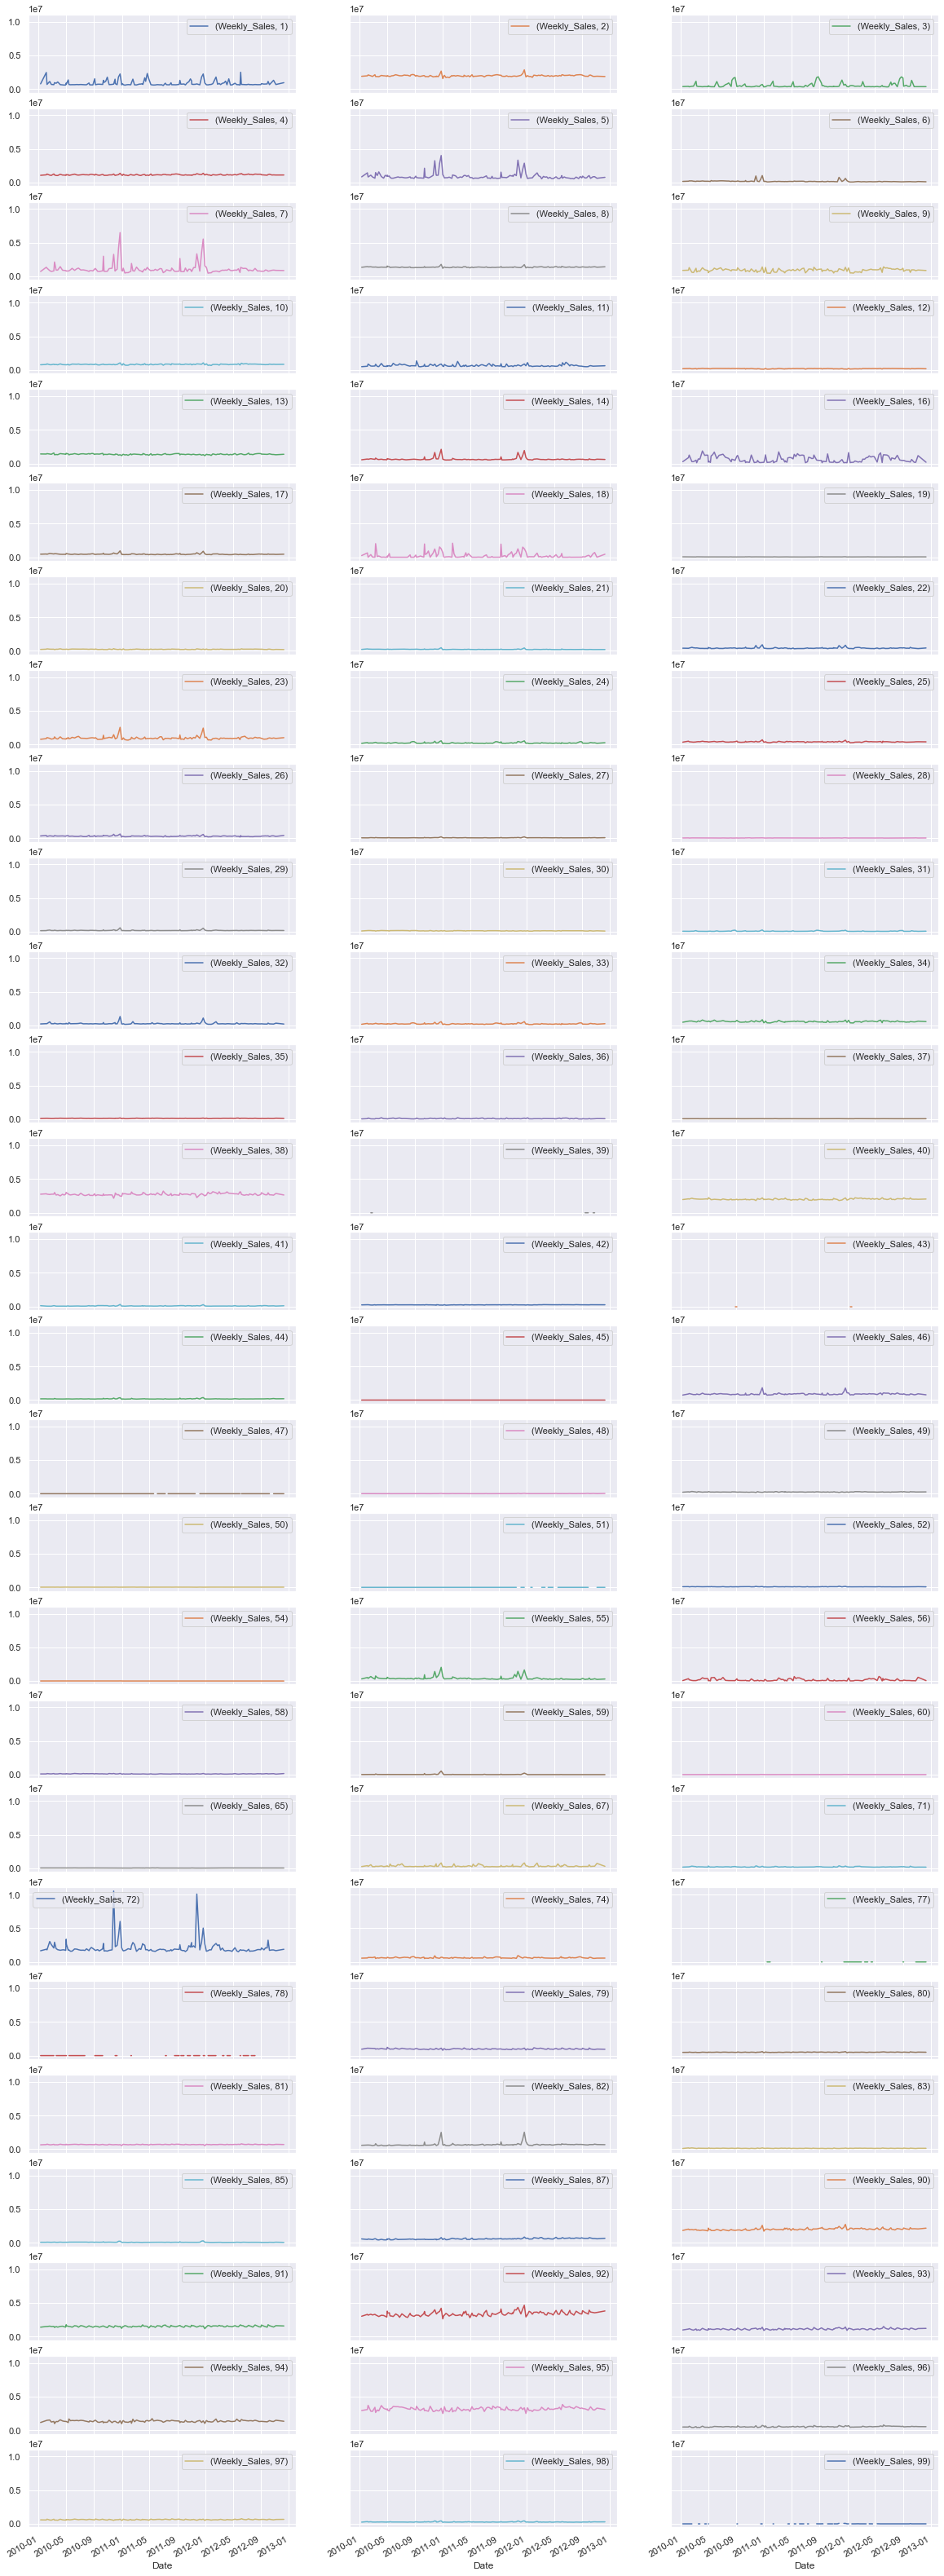

In [18]:
# Plot store-wide weekly sales for all departments, ordered by date
_ = df3s.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (30, 3), sharey=True, sharex=True)
plt.show()
plt.close()

#### Group data by date and department, aggregate mean weekly sales, and plot

In [19]:
# Group dataframe by date and department and aggregate mean weekly sales
df3m = df.groupby(['Date', 'Dept'])[['Weekly_Sales']].mean().sort_index()

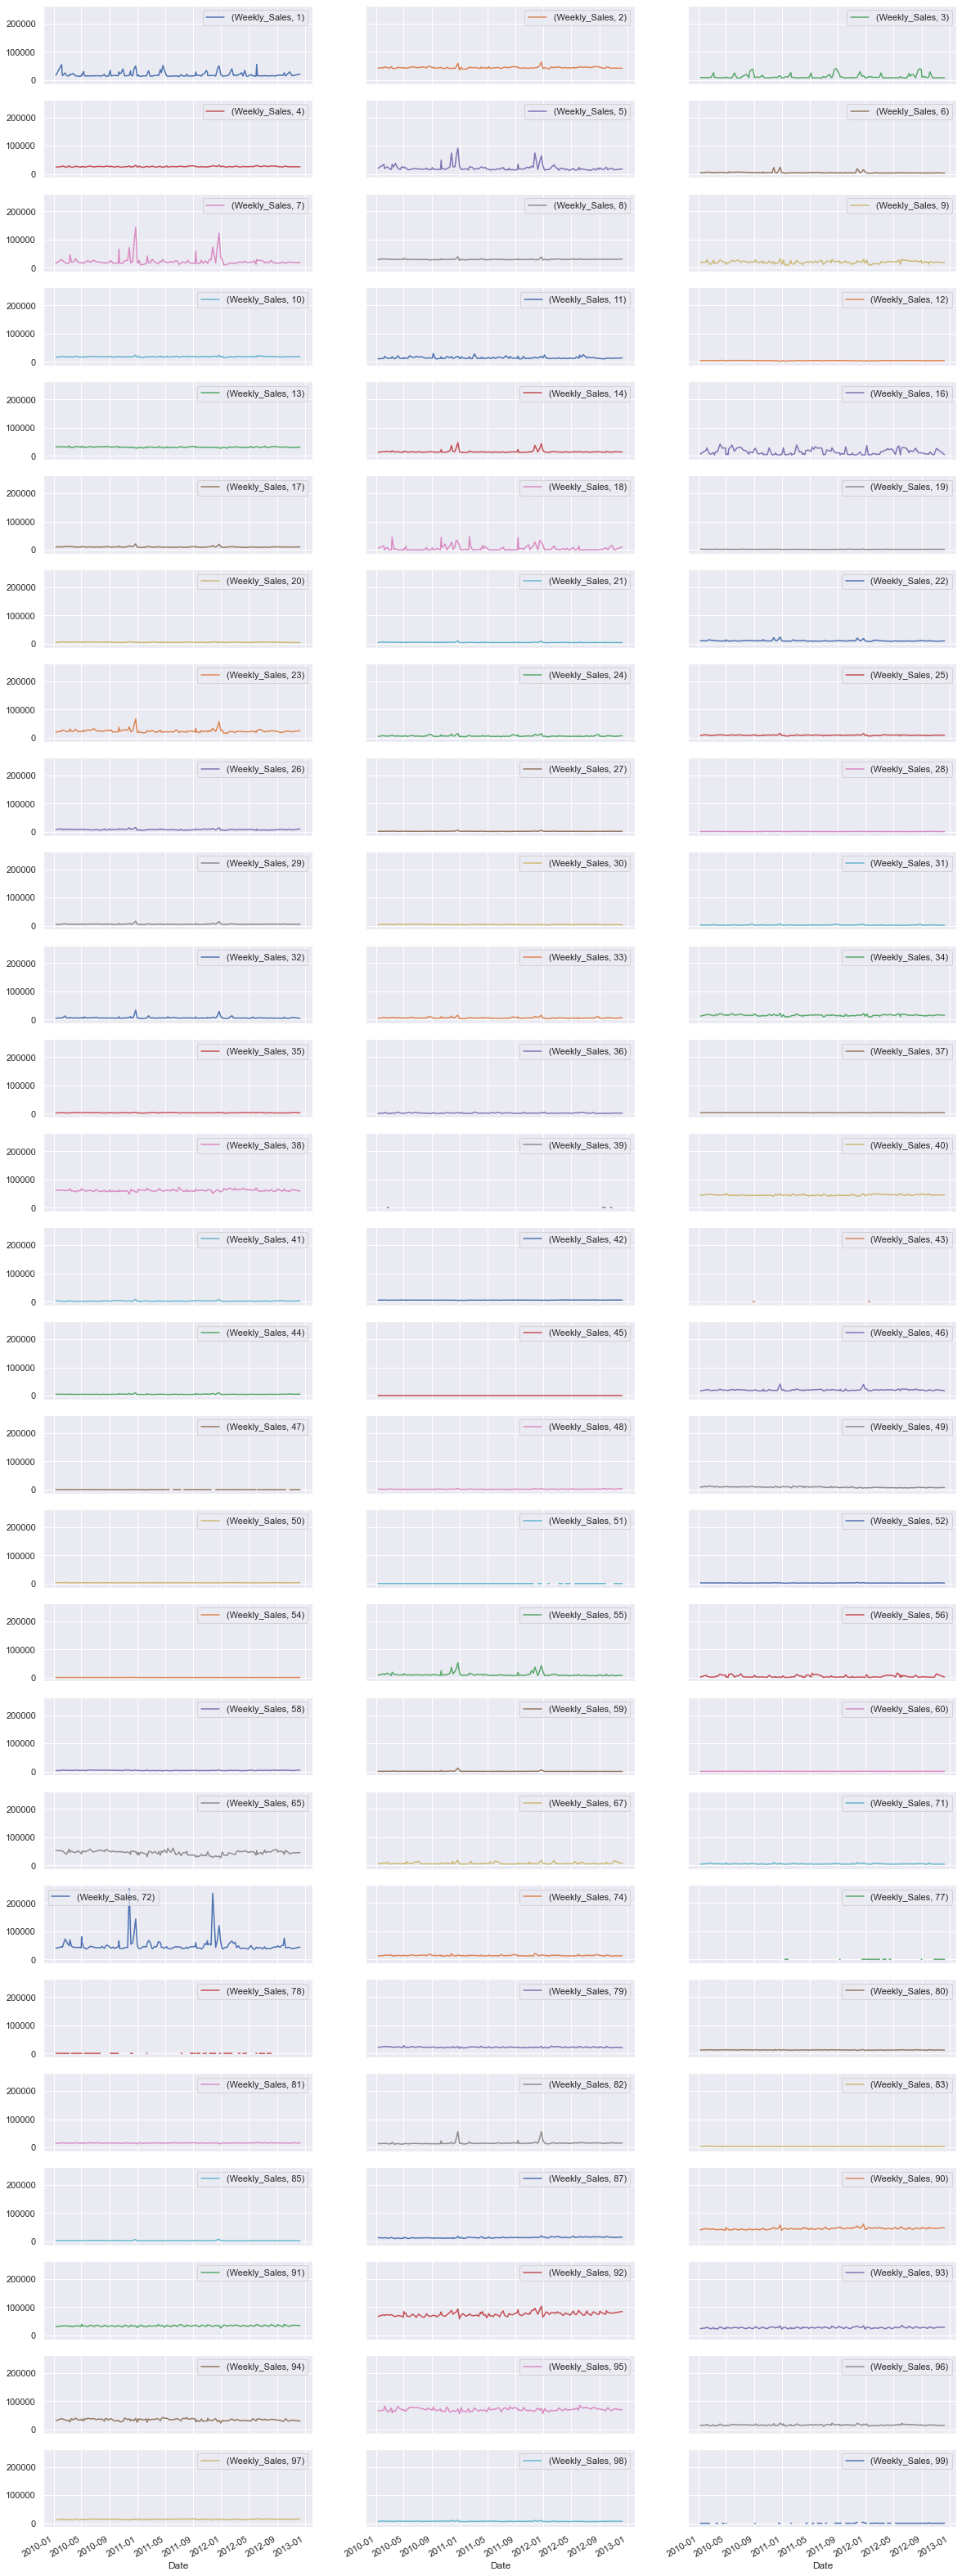

In [20]:
# Do the same but aggregating for mean rather than sum
_ = df3m.unstack(level=1).sort_index().plot(kind = 'line', subplots = True, figsize = (20, 70), layout = (30, 3), sharey=True, sharex=True)
plt.show()
plt.close()

In [38]:
# Group data by department and aggregate mean weekly sales
df3m1 = df.groupby(['Dept'])[['Weekly_Sales']].mean().reset_index()

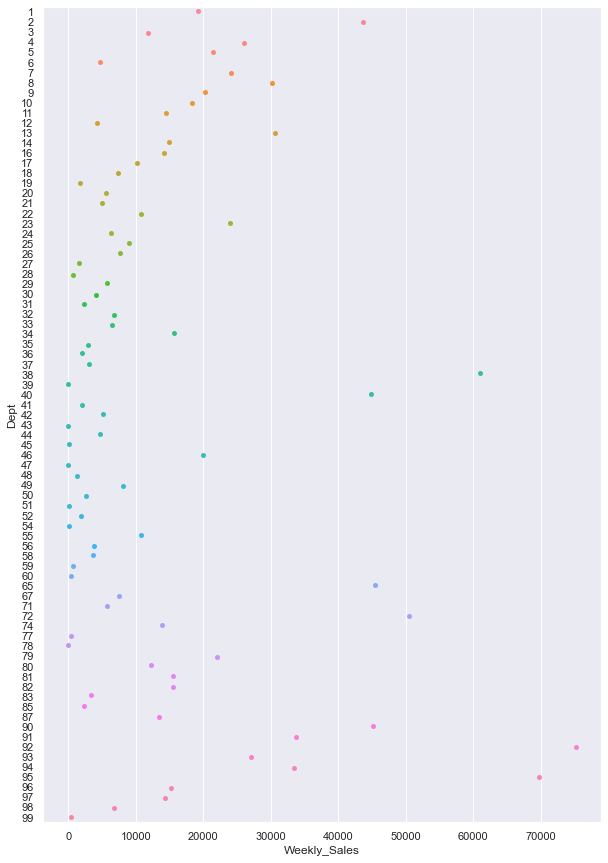

In [22]:
# Plot stripplot of department mean weekly sales to get a sense of spread
_, ax = plt.subplots(figsize=(10, 15))
_ = sns.stripplot(x='Weekly_Sales', y='Dept', data=df3m1, ax=ax, orient='h')
plt.show()
plt.close()

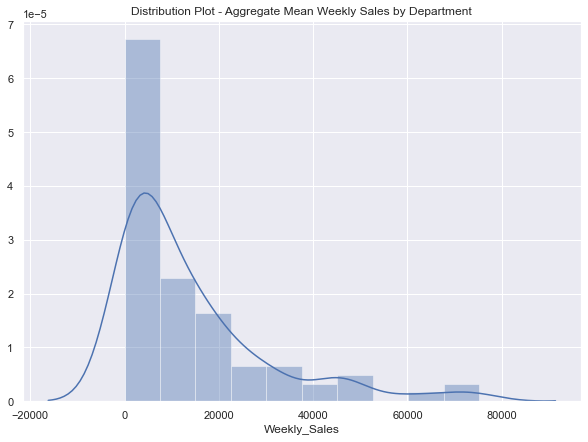

In [44]:
# Plot distplot plot of department mean weekly sales to get a sense of distribution.
_ = plt.figure(figsize=(10, 7))
_ = sns.distplot(df3m1['Weekly_Sales'])
plt.title('Distribution Plot - Aggregate Mean Weekly Sales by Department')
plt.show()
plt.close()

#### Convert Type and IsHoliday features into a numerical categorical features

In [24]:
#Converting boolean values in holiday column to integers
df['IsHoliday'] = df['IsHoliday'].astype(int)
dfpost['IsHoliday'] = dfpost['IsHoliday'].astype(int)

In [25]:
#Converting A/B distinction in Type into integers
df['Type'] = df['Type'].replace({'A':2, 'B':1, 'C':0})
dfpost['Type'] = dfpost['Type'].replace({'A':2, 'B':1, 'C':0})

In [26]:
df['Type'] = df['Type'].astype(int)
dfpost['Type'] = dfpost['Type'].astype(int)

#### Create pearson pairplot to visualize data for entire dataset. Remove MarkDowns as they only apply to half the data

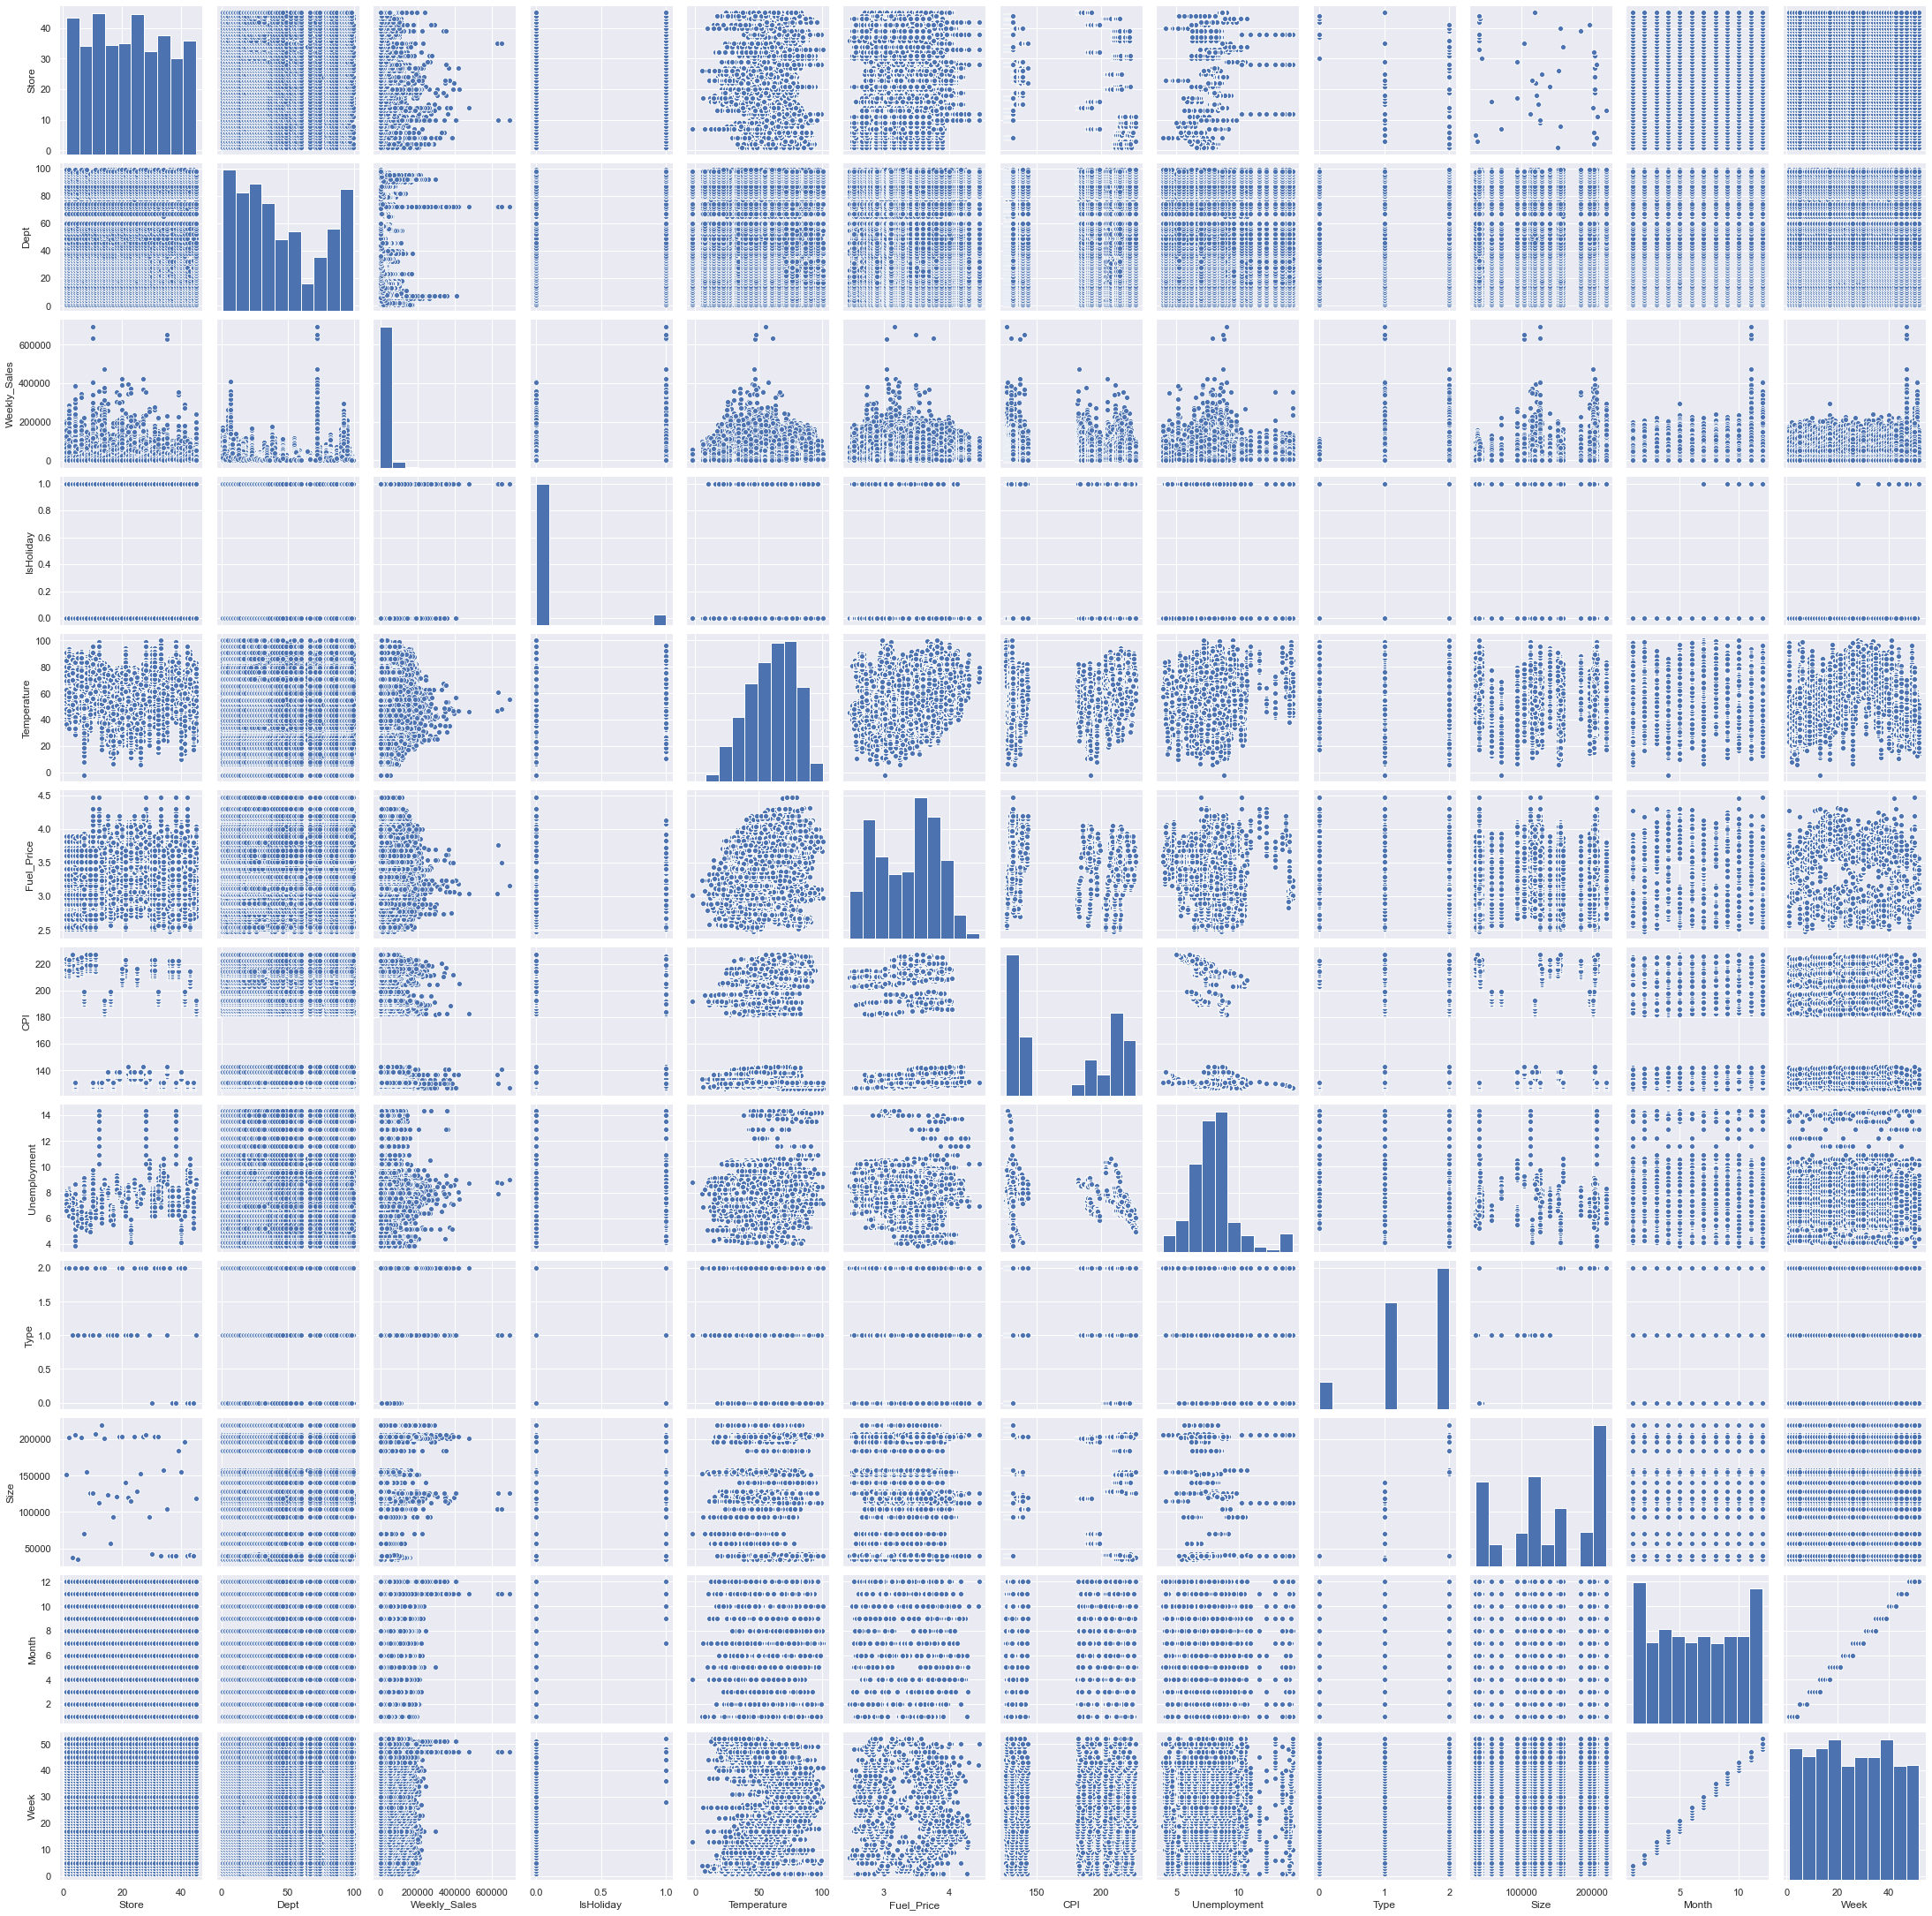

In [27]:
_ = sns.pairplot(df.drop(columns=['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']))
plt.show()
plt.close()

#### Create pearson pairplot to visualize half of data containing MarkDowns.

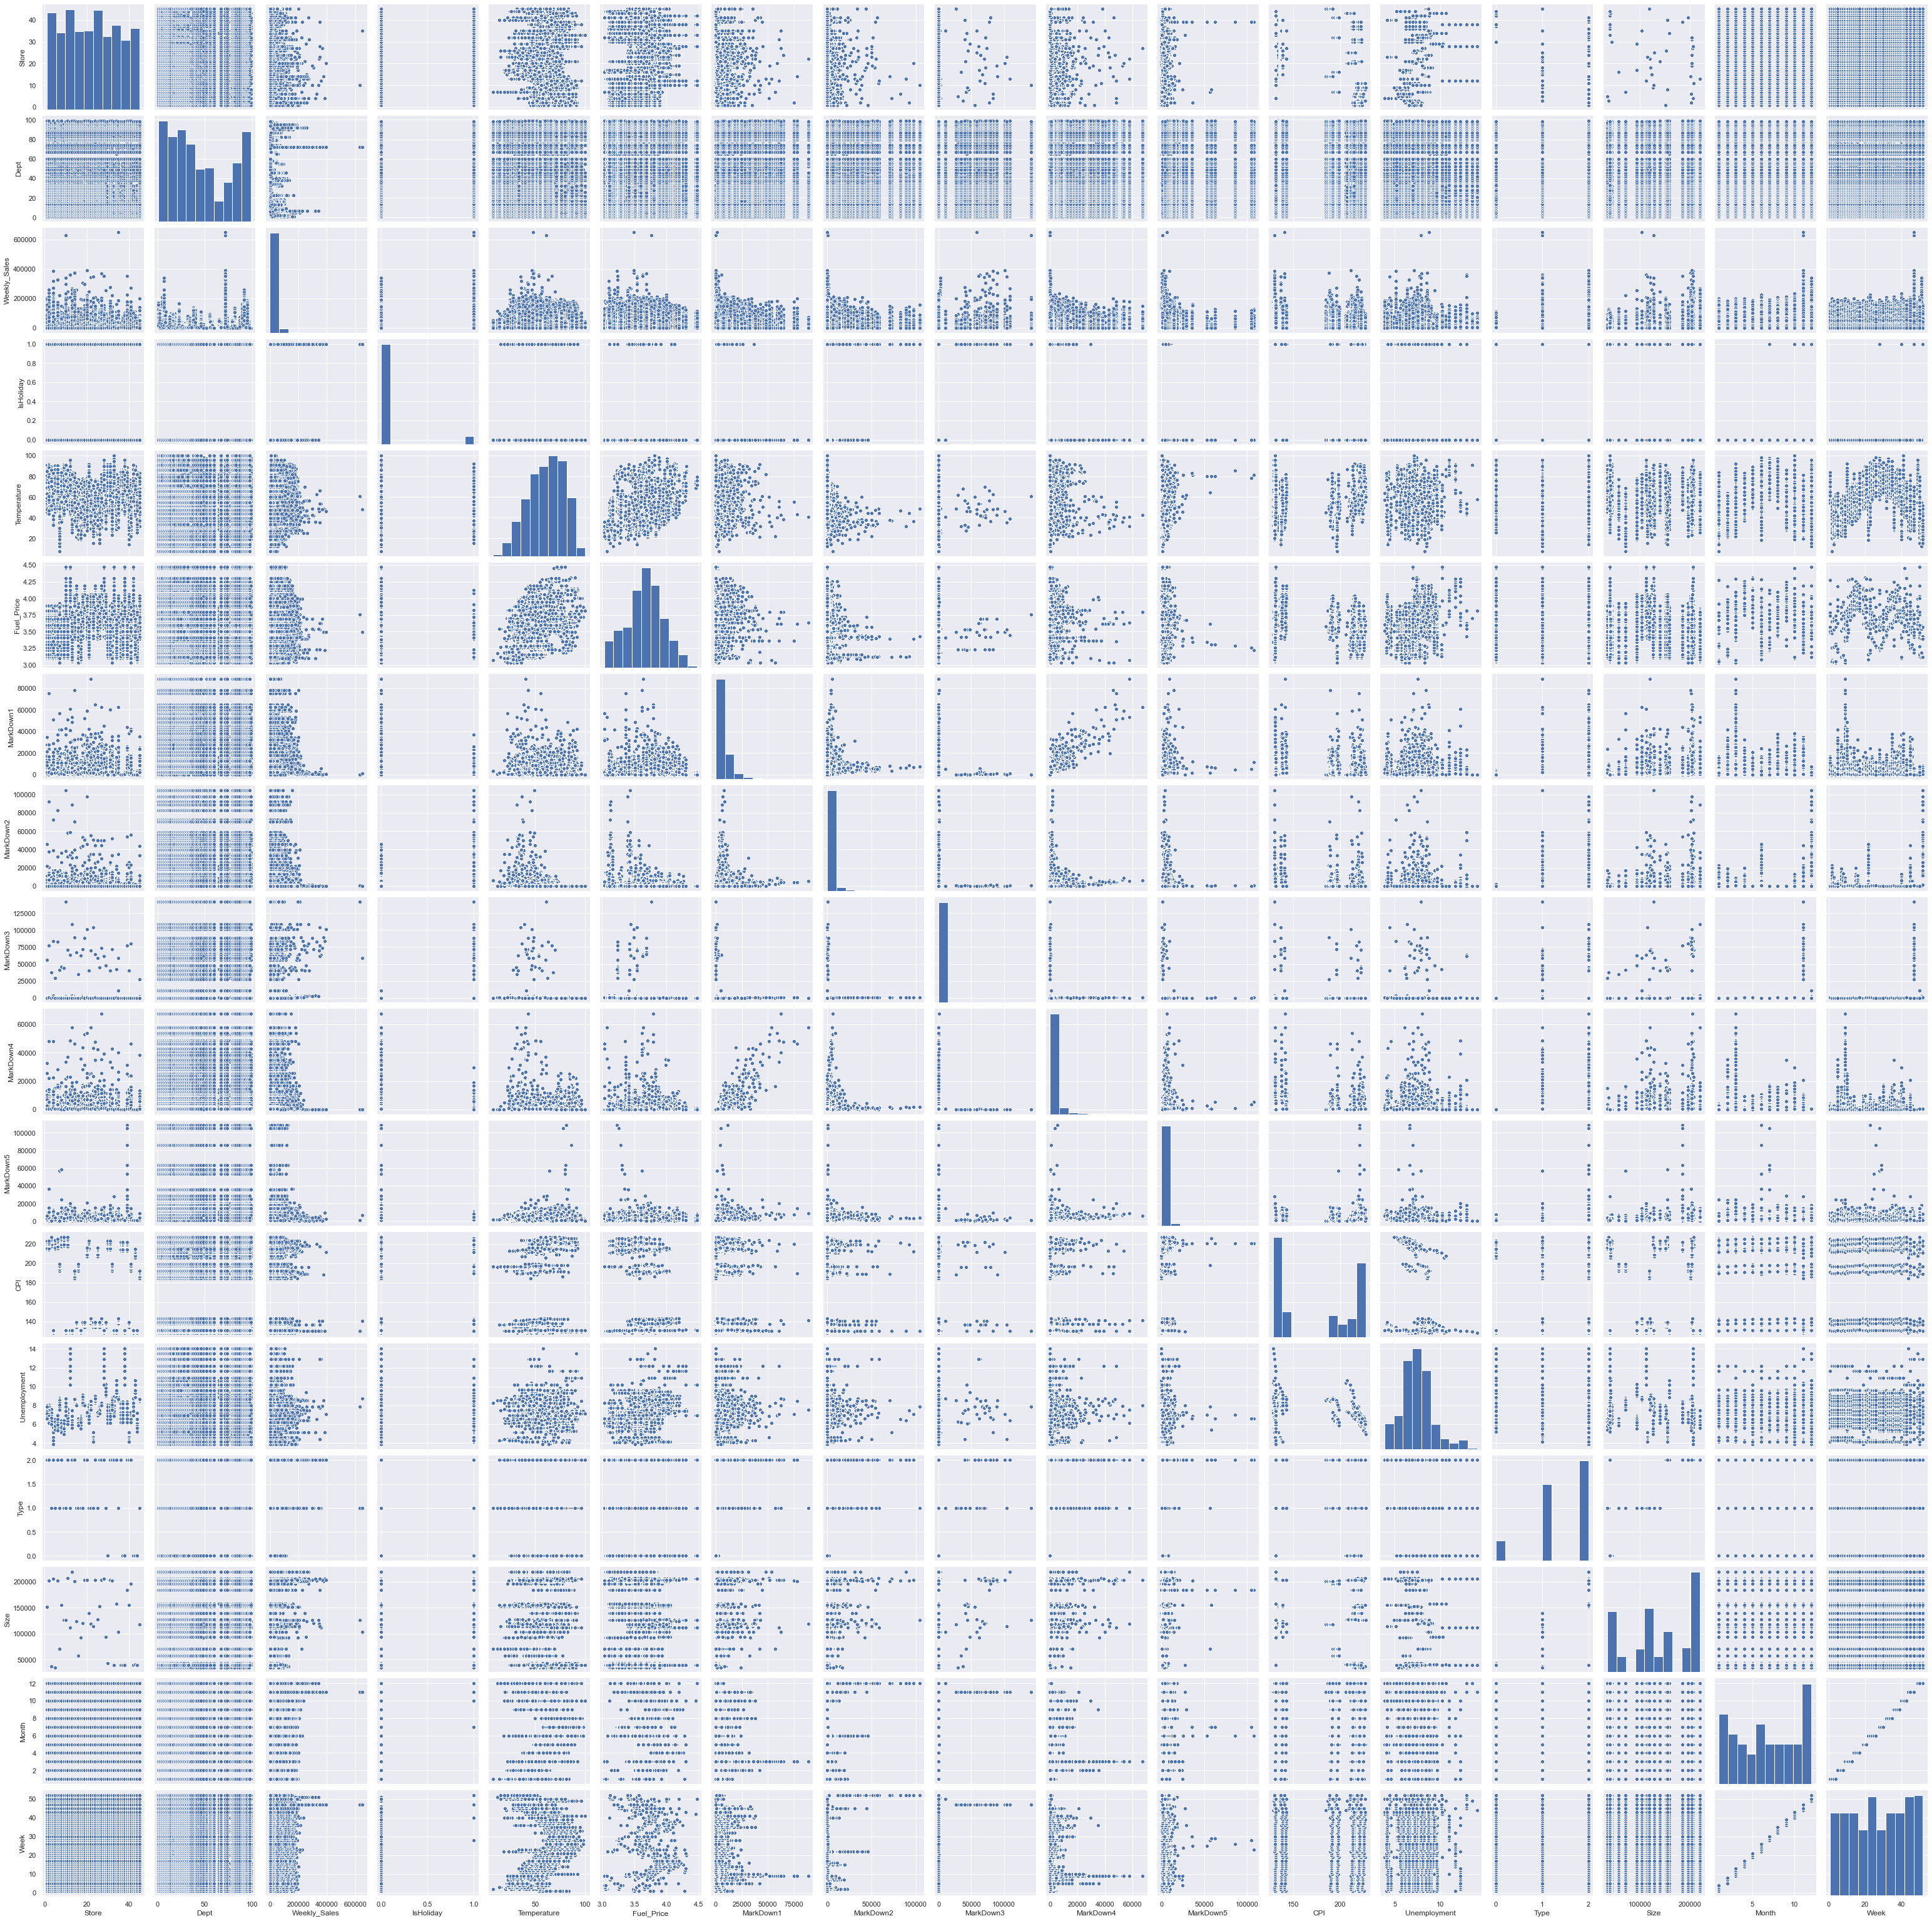

In [28]:
_ = sns.pairplot(dfpost.drop(columns=['Date']))
plt.show()
plt.close()

Takeaways from the pairplots:
 - MarkDown 3 seems to have the biggest impact on weekly sales.
 - Other MarkDowns seem to have an effect on weekly sales, but not incredibly drastic.
 - MarkDown 4 and MarkDown 1 are related. Should drop one of them.
 - Extreme temperatures (hot or cold) seem to impact weekly_sales negatively.
 - MarkDown 3 seems related to whether it's a holiday. Most instances of MarkDown 3 are on holidays. Perhaps MarkDown 3 is tied to holiday related discounts. 
 - MarkDown 2 is also correlated with holiday status, but the impact of MarkDown 2 is much less than of MarkDown 3.
 - There is potentially a linear correlation between store size and weekly sales
 - CPI and Unemployment don't seem to have a big impact on weekly sales
 - MarkDown 3 almost never occurs simultaneously with other MarkDowns

 

#### Create heatmaps

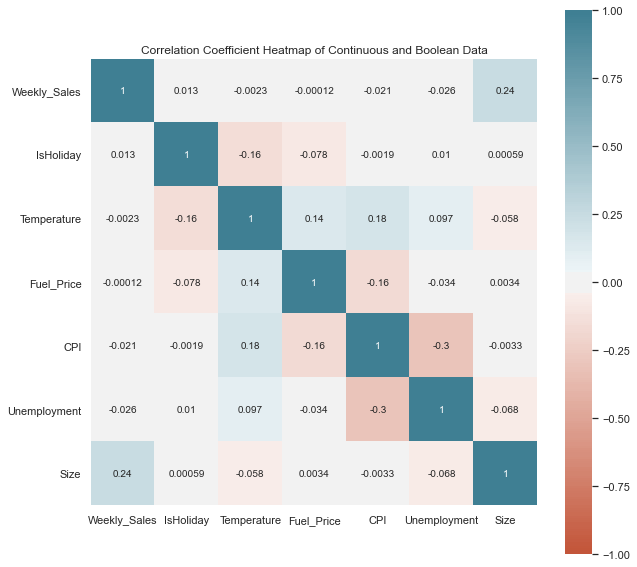

In [17]:
# heatmap of continous and boolean data, removing categorical data
corr = df.drop(columns=['Store', 'Dept', 'Month', 'Week', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']).corr()

_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
_ = plt.title('Correlation Coefficient Heatmap of Continuous and Boolean Data')


plt.show()
plt.close()

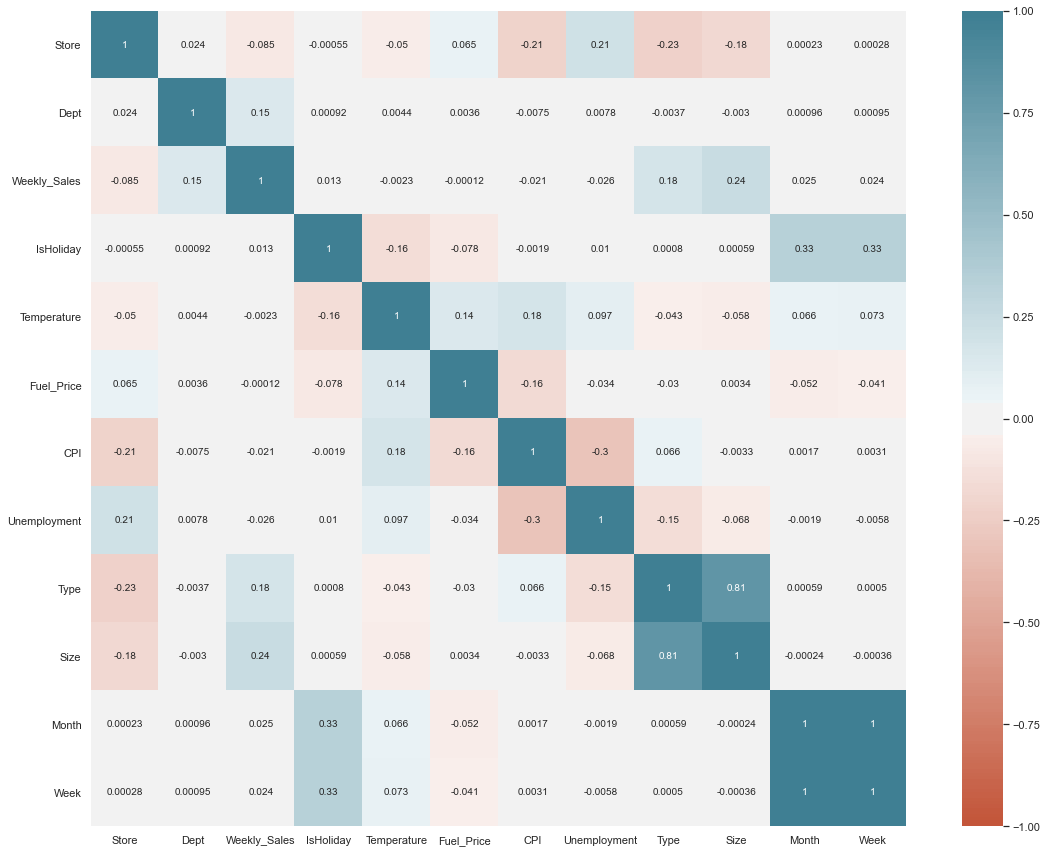

In [29]:
# heatmap entire data set, dropping markdowns
corr = df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']).corr()

_, ax = plt.subplots(figsize=(20,15))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, ax=ax)



plt.show()
plt.close()

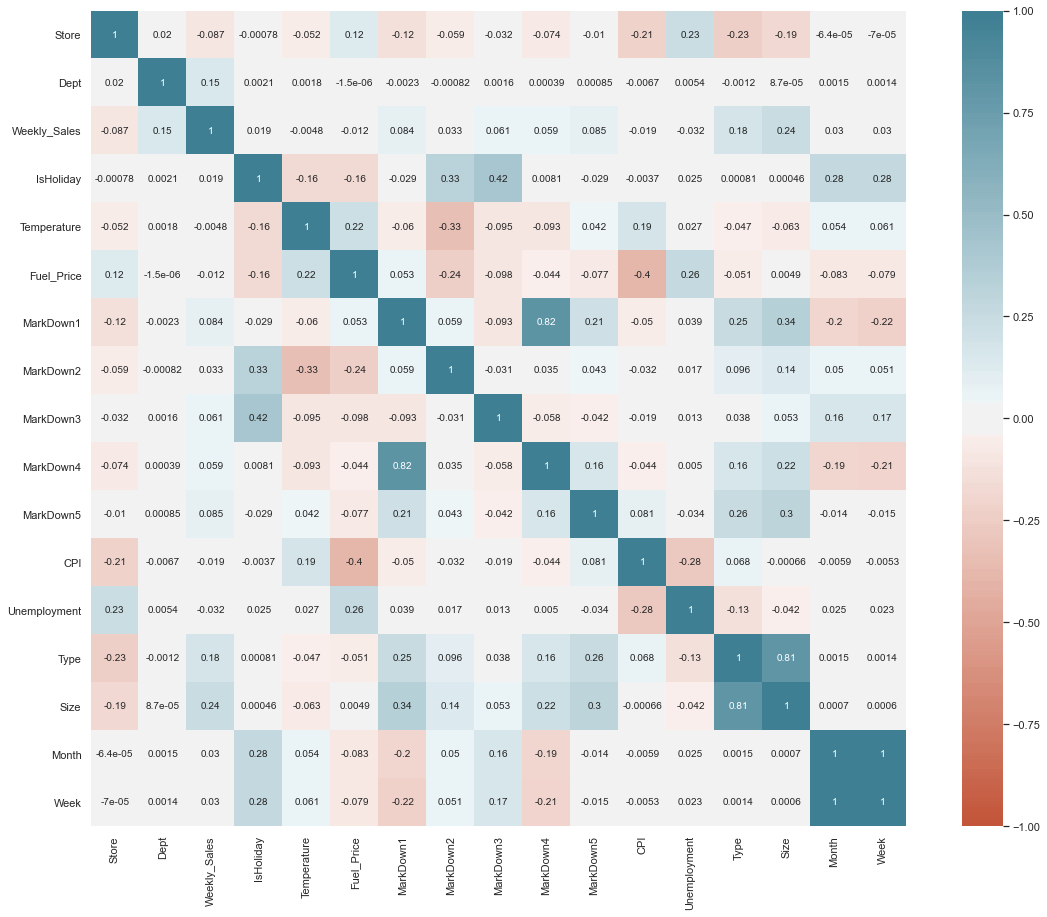

In [30]:
# heatmap data containing markdowns
corr = dfpost.corr()

_, ax = plt.subplots(figsize=(20,15))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, ax=ax)



plt.show()
plt.close()

Try logistic regression to predict weekly sales. Try out different models and see what variables are impactful and what variables are not. If it's possible to build a successfully predictive model without markdown explanatory variables, then we should do that because it gives us access to train the entire data set rather than the half that contains markdown data.

In [34]:
df.to_csv('data post-eda.csv', index=False)